# Visualize NN

In [1]:
# Imports
from GLOBALS import *
from alg_nets import *

In [2]:
HIDDEN_SIZE

64

In [108]:
actor = ActorNet(4,1)
critic = CriticNet(4,1,1)
target_critic = CriticNet(4,1,1)

In [4]:
actor

ActorNet(
  (fc1): Linear(in_features=4, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
  (net): Sequential(
    (0): Linear(in_features=4, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=1, bias=True)
    (3): Tanh()
  )
)

In [5]:
critic

CriticNet(
  (fc1): Linear(in_features=4, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=4, bias=True)
  (fc3): Linear(in_features=5, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=1, bias=True)
  (obs_net): Sequential(
    (0): Linear(in_features=4, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=4, bias=True)
    (3): ReLU()
  )
  (out_net): Sequential(
    (0): Linear(in_features=5, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=1, bias=True)
  )
)

## Heatmap

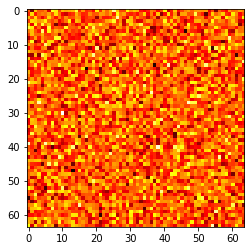

array([[-0.0851287 , -2.42022243,  1.11429819, ...,  0.24241353,
         0.7233658 ,  0.43220935],
       [-0.57497944,  1.38572924, -0.78560001, ...,  0.39844764,
        -1.03102768, -0.21711468],
       [ 0.96025908, -0.24688899,  1.35330677, ...,  0.15593421,
        -0.75190179,  1.52044784],
       ...,
       [ 0.78014057,  0.95155645,  1.65080288, ..., -0.38109782,
         0.66489252, -0.39602911],
       [ 0.92494837,  0.5120928 , -1.85629186, ...,  0.41263002,
         1.00862847, -1.71813437],
       [ 1.76008229, -1.40029499,  1.42278491, ...,  1.62499015,
        -0.13670846, -0.29589853]])

In [27]:
a = np.random.randn(64,64)
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()
a

## Parameters


In [67]:
# actor.fc2.weight
weights_fc1 = list(actor.parameters())[0].data.numpy().copy()
shape_weights_fc1 = weights_fc1.shape
weights_fc1 = weights_fc1.reshape((1, np.dot(*shape_weights_fc1)))
# weights_fc1.shape[0] % 64
weights_fc1.shape

(1, 256)

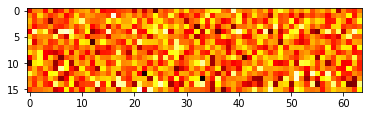

array([-0.11243102, -0.02769113, -0.01811605,  0.0264976 ,  0.0528204 ,
       -0.29575223, -0.2111693 ,  0.21980542, -0.14988981,  0.06032706,
       -0.17703822,  0.15028283,  0.09187389, -0.33760434, -0.08377649,
        0.07831556,  0.08605394, -0.27071819,  0.13281637,  0.09746261,
        0.24373998,  0.52467316, -0.25318241,  0.45198834,  0.1191216 ,
       -0.01140049,  0.12886859, -0.01589098, -0.21742859,  0.16767262,
        0.04862802, -0.01143142, -0.00820263, -0.03413134, -0.07177457,
       -0.34680811,  0.06537143, -0.4117856 , -0.14388001,  0.07803573,
       -0.1055211 ,  0.01650396,  0.07091788,  0.33940285,  0.02562264,
        0.13464399,  0.45110908,  0.13029298,  0.13214312,  0.01062758,
       -0.24476142,  0.29410475,  0.20531116,  0.0119822 , -0.00257612,
        0.02455147, -0.16334523,  0.03767759,  0.16481027,  0.09326686,
        0.10272978,  0.04391136, -0.11398898,  0.23632   ])

In [107]:
def get_matrix(net):
    matrix = np.zeros((1,64))
    for layer in list(net.parameters()):
        layer_np = layer.data.numpy().copy()
        # print(len(layer_np.shape))
        if len(layer_np.shape) > 1:
            layer_np = layer_np.reshape((1, np.dot(*layer_np.shape)))
        else:
            layer_np = layer_np.reshape((1, layer_np.shape[0]))
        to_add = np.zeros((1, layer_np.shape[1] % 64))
        layer_np = np.concatenate((layer_np, to_add), axis=1)
        times64 = int(layer_np.shape[1] / 64)
        for t in range(times64):
            one_part = layer_np[:,t*64:(t+1)*64]
            matrix = np.concatenate((matrix, one_part), axis=0)
    return matrix[1:,:]
mat = get_matrix(critic)
plt.imshow(mat, cmap='hot', interpolation='nearest')
plt.show()
mat[-1]

In [106]:
list(critic.parameters())[-2]

Parameter containing:
tensor([[-0.1124, -0.0277, -0.0181,  0.0265,  0.0528, -0.2958, -0.2112,  0.2198,
         -0.1499,  0.0603, -0.1770,  0.1503,  0.0919, -0.3376, -0.0838,  0.0783,
          0.0861, -0.2707,  0.1328,  0.0975,  0.2437,  0.5247, -0.2532,  0.4520,
          0.1191, -0.0114,  0.1289, -0.0159, -0.2174,  0.1677,  0.0486, -0.0114,
         -0.0082, -0.0341, -0.0718, -0.3468,  0.0654, -0.4118, -0.1439,  0.0780,
         -0.1055,  0.0165,  0.0709,  0.3394,  0.0256,  0.1346,  0.4511,  0.1303,
          0.1321,  0.0106, -0.2448,  0.2941,  0.2053,  0.0120, -0.0026,  0.0246,
         -0.1633,  0.0377,  0.1648,  0.0933,  0.1027,  0.0439, -0.1140,  0.2363]],
       requires_grad=True)

In [75]:
a = np.array([[1, 2, 3, 4]])
b = np.array([[5, 6]])
np.concatenate((a, b), axis=1)

array([[1, 2, 3, 4, 5, 6]])

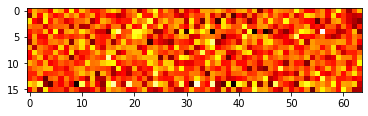

In [112]:
def get_diff_matrix(mat1, mat2):
    mat1 = get_matrix(critic)
    mat2 = get_matrix(target_critic)
    mat3 = mat1 - mat2
    return mat3
mat3 = get_diff_matrix(get_matrix(critic), get_matrix(target_critic))
plt.imshow(mat3, cmap='hot', interpolation='nearest')
plt.show()

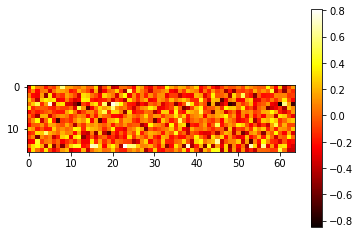

In [124]:
# target_critic.load_state_dict(critic.state_dict())
target_critic = CriticNet(4,1,1)
mat1 = get_matrix(critic)
mat2 = get_matrix(target_critic)
mat3 = mat1 - mat2
plt.imshow(mat3, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

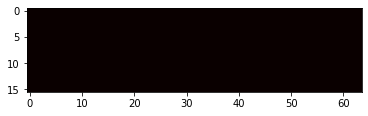

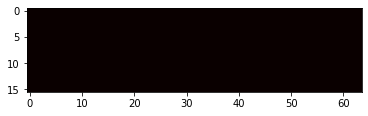

In [122]:
def get_diff_matrix(net1, net2):
    mat1 = get_matrix(net1)
    mat2 = get_matrix(net2)
    mat3 = mat1 - mat2
    return mat3
mat3 = get_diff_matrix(critic, target_critic)
plt.imshow(mat3, cmap='hot', interpolation='nearest')
plt.show()